## Using Pandas to Analyze a Barangay-level COVID-19 Dataset

As part of my journey toward data science, I have been studying Pandas, the most popular library in the scientific Python ecosystem for doing data analysis. In this post, I highlight some features of Pandas using a barangay-level dataset of COVID-19 cases in Malabon City. This Jupyter notebook is organized as follows. Section 1 imports libraries and reads raw data, and Section 2 tidies raw data. In Section 3, we perform simple data analysis and visualizations. The last section concludes.

### 1. Import libraries and read data

First, we import all necessary libraries: Pandas (of course), Matplotlib (for the data visualizations), and NumPy (for the numerical computations):

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

The raw data is available to the public and uploaded in my GitHub. Let's read the dataset from this the GitHub repository:

In [2]:
url = 'https://raw.githubusercontent.com/jessonpagaduan/covid_malabon/master/covid_malabon_jupyter_june26.csv'
df1 = pd.read_csv(url, header=0, index_col=0)

### 2. Tidying data

Let us have a quick snapshot of the dataset. The file contains longitudinal information on the cumulative number of confirmed cases, deaths, and recoveries for 23 sub-units in Malabon City (21 barangays, unconfirmed address, and outside the city) from 26 March 2020 to 26 June 2020. This gives a total of 2,139 observations.

In [3]:
df1.head()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
26-Mar-20,1,Acacia,0,0,0
27-Mar-20,1,Acacia,0,0,0
28-Mar-20,1,Acacia,0,0,0
29-Mar-20,1,Acacia,0,0,0
30-Mar-20,1,Acacia,0,0,0


In [4]:
df1.tail()

,barangay,brgy,confirmed_cases,deaths,recovered
date,,,,,
22-Jun-20,23,Outside Malabon,4,0,3
23-Jun-20,23,Outside Malabon,4,0,3
24-Jun-20,23,Outside Malabon,4,0,3
25-Jun-20,23,Outside Malabon,4,0,3
26-Jun-20,23,Outside Malabon,4,0,3


In [5]:
df1.index

Index(['26-Mar-20', '27-Mar-20', '28-Mar-20', '29-Mar-20', '30-Mar-20',
       '31-Mar-20', '1-Apr-20', '2-Apr-20', '3-Apr-20', '4-Apr-20',
       ...
       '17-Jun-20', '18-Jun-20', '19-Jun-20', '20-Jun-20', '21-Jun-20',
       '22-Jun-20', '23-Jun-20', '24-Jun-20', '25-Jun-20', '26-Jun-20'],
      dtype='object', name='date', length=2139)

In [6]:
df1.brgy.unique()

array(['Acacia', 'Baritan', 'Bayan-Bayanan', 'Catmon', 'Concepcion',
       'Dampalit', 'Flores', 'Hulong Duhat', 'Ibaba', 'Longos', 'Maysilo',
       'Muzon', 'Niugan', 'Panghulo', 'Potrero', 'San Agustin',
       'Santulan', 'Tanong', 'Tinajeros', 'Tonsuya', 'Tugatog',
       'Unconfirmed Address', 'Outside Malabon'], dtype=object)

In [7]:
len(df1.brgy.unique())

23

In [8]:
df1.describe()

,barangay,confirmed_cases,deaths,recovered
count,2139.000000,2139.000000,2139.000000,2139.000000
mean,12.000000,5.326321,0.672744,1.789154
std,6.634801,8.928000,1.504114,3.552619
min,1.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000
50%,12.000000,2.000000,0.000000,0.000000
75%,18.000000,5.000000,1.000000,2.000000
max,23.000000,69.000000,12.000000,28.000000


Let us tidy things up in the raw file. First, let us parse the time series information, which are the dates, in the raw file and convert it to datetime64 dtype.

In [9]:
date = pd.to_datetime(df1.index)

In [10]:
date

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2020-06-26'],
              dtype='datetime64[ns]', name='date', length=2139, freq=None)

We can now construct our index. It has two levels, the barangay and the date.

In [11]:
index = pd.MultiIndex.from_arrays([df1.brgy, date], names=['brgy_name', 'date'])

In [12]:
index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-17'),
            ('Outside Malabon', '2020-06-18'),
            ('Outside Malabon', '2020-06-19'),
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26')],
           names=['brgy_name', 'date'], len

In [13]:
df1.set_index(index, inplace=True)

In [14]:
df1

barangay             brgy  confirmed_cases  \
brgy_name       date                                                     
Acacia          2020-03-26         1           Acacia                0   
                2020-03-27         1           Acacia                0   
                2020-03-28         1           Acacia                0   
                2020-03-29         1           Acacia                0   
                2020-03-30         1           Acacia                0   
...                              ...              ...              ...   
Outside Malabon 2020-06-22        23  Outside Malabon                4   
                2020-06-23        23  Outside Malabon                4   
                2020-06-24        23  Outside Malabon                4   
                2020-06-25        23  Outside Malabon                4   
                2020-06-26        23  Outside Malabon                4   

                            deaths  recovered  
brgy_name       date                           
Acacia          2020-03-26       0          0  
                2020-03-27       0          0  
                2020-03-28       0          0  
                2020-03-29       0          0  
                2020-03-30       0          0  
...                            ...        ...  
Outside Malabon 2020-06-22       0          3  
                2020-06-23       0          3  
                2020-06-24       0          3  
                2020-06-25       0          3  
                2020-06-26       0          3  

[2139 rows x 5 columns]

In [15]:
df1.index

MultiIndex([(         'Acacia', '2020-03-26'),
            (         'Acacia', '2020-03-27'),
            (         'Acacia', '2020-03-28'),
            (         'Acacia', '2020-03-29'),
            (         'Acacia', '2020-03-30'),
            (         'Acacia', '2020-03-31'),
            (         'Acacia', '2020-04-01'),
            (         'Acacia', '2020-04-02'),
            (         'Acacia', '2020-04-03'),
            (         'Acacia', '2020-04-04'),
            ...
            ('Outside Malabon', '2020-06-17'),
            ('Outside Malabon', '2020-06-18'),
            ('Outside Malabon', '2020-06-19'),
            ('Outside Malabon', '2020-06-20'),
            ('Outside Malabon', '2020-06-21'),
            ('Outside Malabon', '2020-06-22'),
            ('Outside Malabon', '2020-06-23'),
            ('Outside Malabon', '2020-06-24'),
            ('Outside Malabon', '2020-06-25'),
            ('Outside Malabon', '2020-06-26')],
           names=['brgy_name', 'date'], len

Renaming the column names:

In [16]:
df1.columns

Index(['barangay', 'brgy', 'confirmed_cases', 'deaths', 'recovered'], dtype='object')

In [17]:
del df1['brgy']

In [18]:
df1.columns = ['brgy_id', 'confirmed', 'death', 'recovered']

In [19]:
df1

brgy_id  confirmed  death  recovered
brgy_name       date                                            
Acacia          2020-03-26        1          0      0          0
                2020-03-27        1          0      0          0
                2020-03-28        1          0      0          0
                2020-03-29        1          0      0          0
                2020-03-30        1          0      0          0
...                             ...        ...    ...        ...
Outside Malabon 2020-06-22       23          4      0          3
                2020-06-23       23          4      0          3
                2020-06-24       23          4      0          3
                2020-06-25       23          4      0          3
                2020-06-26       23          4      0          3

[2139 rows x 4 columns]

Since the dataset is barangay-level, we can generate a set of series for city-wide confirmed cases, deaths, and recoveries. Appending this to our current dataframe allows us to do both city-wide and barangay-level data analysis.

In [20]:
malabon = df1.sum(level=1)

In [21]:
malabon

,brgy_id,confirmed,death,recovered
date,,,,
2020-03-26,276,0,0,0
2020-03-27,276,0,0,0
2020-03-28,276,0,0,0
2020-03-29,276,0,0,0
2020-03-30,276,0,0,0
...,...,...,...,...
2020-06-22,276,368,48,152
2020-06-23,276,385,48,156
2020-06-24,276,394,49,160


In [22]:
malabon['brgy_id'] = 24

In [23]:
malabon.insert(0, 'brgy_name', 'Malabon City')

In [24]:
malabon

,brgy_name,brgy_id,confirmed,death,recovered
date,,,,,
2020-03-26,Malabon City,24,0,0,0
2020-03-27,Malabon City,24,0,0,0
2020-03-28,Malabon City,24,0,0,0
2020-03-29,Malabon City,24,0,0,0
2020-03-30,Malabon City,24,0,0,0
...,...,...,...,...,...
2020-06-22,Malabon City,24,368,48,152
2020-06-23,Malabon City,24,385,48,156
2020-06-24,Malabon City,24,394,49,160


In [25]:
type(malabon)

pandas.core.frame.DataFrame

In [26]:
malabon.index

DatetimeIndex(['2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
               '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10',
               '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18',
               '2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
      

In [27]:
malabon.set_index(['brgy_name', malabon.index], inplace=True)

In [28]:
malabon

brgy_id  confirmed  death  recovered
brgy_name    date                                            
Malabon City 2020-03-26       24          0      0          0
             2020-03-27       24          0      0          0
             2020-03-28       24          0      0          0
             2020-03-29       24          0      0          0
             2020-03-30       24          0      0          0
...                          ...        ...    ...        ...
             2020-06-22       24        368     48        152
             2020-06-23       24        385     48        156
             2020-06-24       24        394     49        160
             2020-06-25       24        401     51        161
             2020-06-26       24        415     53        168

[93 rows x 4 columns]

In [29]:
df1 = df1.append(malabon)

In [30]:
df1

brgy_id  confirmed  death  recovered
brgy_name    date                                            
Acacia       2020-03-26        1          0      0          0
             2020-03-27        1          0      0          0
             2020-03-28        1          0      0          0
             2020-03-29        1          0      0          0
             2020-03-30        1          0      0          0
...                          ...        ...    ...        ...
Malabon City 2020-06-22       24        368     48        152
             2020-06-23       24        385     48        156
             2020-06-24       24        394     49        160
             2020-06-25       24        401     51        161
             2020-06-26       24        415     53        168

[2232 rows x 4 columns]

We can create a new column for active cases, and generate daily new cases, deaths, and recoveries from the cumulative counts. We can also calculate seven-day moving averages.

In [31]:
df1 = df1.assign(active = lambda x: x.confirmed - x.death - x.recovered)

In [32]:
df1.loc['Malabon City', :]

,brgy_id,confirmed,death,recovered,active
date,,,,,
2020-03-26,24,0,0,0,0
2020-03-27,24,0,0,0,0
2020-03-28,24,0,0,0,0
2020-03-29,24,0,0,0,0
2020-03-30,24,0,0,0,0
...,...,...,...,...,...
2020-06-22,24,368,48,152,168
2020-06-23,24,385,48,156,181
2020-06-24,24,394,49,160,185


In [33]:
df1.groupby(level=0).diff().iloc[:, 1:]

confirmed  death  recovered  active
brgy_name    date                                           
Acacia       2020-03-26        NaN    NaN        NaN     NaN
             2020-03-27        0.0    0.0        0.0     0.0
             2020-03-28        0.0    0.0        0.0     0.0
             2020-03-29        0.0    0.0        0.0     0.0
             2020-03-30        0.0    0.0        0.0     0.0
...                            ...    ...        ...     ...
Malabon City 2020-06-22        7.0    0.0        5.0     2.0
             2020-06-23       17.0    0.0        4.0    13.0
             2020-06-24        9.0    1.0        4.0     4.0
             2020-06-25        7.0    2.0        1.0     4.0
             2020-06-26       14.0    2.0        7.0     5.0

[2232 rows x 4 columns]

In [34]:
df1[['new_case', 'new_death', 'new_recovered', 'new_active']] = df1.groupby(level=0).diff().iloc[:, 1:]

In [35]:
df1.fillna(0, inplace=True)

In [36]:
df1.astype('int64')

brgy_id  confirmed  death  recovered  active  \
brgy_name    date                                                       
Acacia       2020-03-26        1          0      0          0       0   
             2020-03-27        1          0      0          0       0   
             2020-03-28        1          0      0          0       0   
             2020-03-29        1          0      0          0       0   
             2020-03-30        1          0      0          0       0   
...                          ...        ...    ...        ...     ...   
Malabon City 2020-06-22       24        368     48        152     168   
             2020-06-23       24        385     48        156     181   
             2020-06-24       24        394     49        160     185   
             2020-06-25       24        401     51        161     189   
             2020-06-26       24        415     53        168     194   

                         new_case  new_death  new_recovered  new_active  
brgy_name    date                                                        
Acacia       2020-03-26         0          0              0           0  
             2020-03-27         0          0              0           0  
             2020-03-28         0          0              0           0  
             2020-03-29         0          0              0           0  
             2020-03-30         0          0              0           0  
...                           ...        ...            ...         ...  
Malabon City 2020-06-22         7          0              5           2  
             2020-06-23        17          0              4          13  
             2020-06-24         9          1              4           4  
             2020-06-25         7          2              1           4  
             2020-06-26        14          2              7           5  

[2232 rows x 9 columns]

In [37]:
df1.groupby(level=0).rolling(7).mean().iloc[:, 5:]

new_case  new_death  \
brgy_name           brgy_name           date                              
Acacia              Acacia              2020-03-26       NaN        NaN   
                                        2020-03-27       NaN        NaN   
                                        2020-03-28       NaN        NaN   
                                        2020-03-29       NaN        NaN   
                                        2020-03-30       NaN        NaN   
...                                                      ...        ...   
Unconfirmed Address Unconfirmed Address 2020-06-22  0.142857        0.0   
                                        2020-06-23  0.000000        0.0   
                                        2020-06-24  0.000000        0.0   
                                        2020-06-25  0.000000        0.0   
                                        2020-06-26  0.000000        0.0   

                                                    new_recovered  new_active  
brgy_name           brgy_name           date                                   
Acacia              Acacia              2020-03-26            NaN         NaN  
                                        2020-03-27            NaN         NaN  
                                        2020-03-28            NaN         NaN  
                                        2020-03-29            NaN         NaN  
                                        2020-03-30            NaN         NaN  
...                                                           ...         ...  
Unconfirmed Address Unconfirmed Address 2020-06-22            0.0    0.142857  
                                        2020-06-23            0.0    0.000000  
                                        2020-06-24            0.0    0.000000  
                                        2020-06-25            0.0    0.000000  
                                        2020-06-26            0.0    0.000000  

[2232 rows x 4 columns]

In [38]:
df1[['case_ma', 'death_ma', 'recovered_ma', 'active_ma']] = df1.groupby(level=0).rolling(7).mean().iloc[:, 5:].reset_index(level=0, drop=True)

In [39]:
df1

brgy_id  confirmed  death  recovered  active  \
brgy_name    date                                                       
Acacia       2020-03-26        1          0      0          0       0   
             2020-03-27        1          0      0          0       0   
             2020-03-28        1          0      0          0       0   
             2020-03-29        1          0      0          0       0   
             2020-03-30        1          0      0          0       0   
...                          ...        ...    ...        ...     ...   
Malabon City 2020-06-22       24        368     48        152     168   
             2020-06-23       24        385     48        156     181   
             2020-06-24       24        394     49        160     185   
             2020-06-25       24        401     51        161     189   
             2020-06-26       24        415     53        168     194   

                         new_case  new_death  new_recovered  new_active  \
brgy_name    date                                                         
Acacia       2020-03-26       0.0        0.0            0.0         0.0   
             2020-03-27       0.0        0.0            0.0         0.0   
             2020-03-28       0.0        0.0            0.0         0.0   
             2020-03-29       0.0        0.0            0.0         0.0   
             2020-03-30       0.0        0.0            0.0         0.0   
...                           ...        ...            ...         ...   
Malabon City 2020-06-22       7.0        0.0            5.0         2.0   
             2020-06-23      17.0        0.0            4.0        13.0   
             2020-06-24       9.0        1.0            4.0         4.0   
             2020-06-25       7.0        2.0            1.0         4.0   
             2020-06-26      14.0        2.0            7.0         5.0   

                           case_ma  death_ma  recovered_ma  active_ma  
brgy_name    date                                                      
Acacia       2020-03-26        NaN       NaN           NaN        NaN  
             2020-03-27        NaN       NaN           NaN        NaN  
             2020-03-28        NaN       NaN           NaN        NaN  
             2020-03-29        NaN       NaN           NaN        NaN  
             2020-03-30        NaN       NaN           NaN        NaN  
...                            ...       ...           ...        ...  
Malabon City 2020-06-22   9.142857  1.142857      8.000000   0.000000  
             2020-06-23  10.000000  1.000000      5.428571   3.571429  
             2020-06-24  10.142857  1.000000      4.571429   4.571429  
             2020-06-25   9.142857  1.285714      4.285714   3.571429  
             2020-06-26   9.857143  1.285714      4.857143   3.714286  

[2232 rows x 13 columns]

In [40]:
df1.iloc[:, :9] = df1.iloc[:, :9].astype('int64')

In [41]:
df1.tail()

brgy_id  confirmed  death  recovered  active  \
brgy_name    date                                                       
Malabon City 2020-06-22       24        368     48        152     168   
             2020-06-23       24        385     48        156     181   
             2020-06-24       24        394     49        160     185   
             2020-06-25       24        401     51        161     189   
             2020-06-26       24        415     53        168     194   

                         new_case  new_death  new_recovered  new_active  \
brgy_name    date                                                         
Malabon City 2020-06-22         7          0              5           2   
             2020-06-23        17          0              4          13   
             2020-06-24         9          1              4           4   
             2020-06-25         7          2              1           4   
             2020-06-26        14          2              7           5   

                           case_ma  death_ma  recovered_ma  active_ma  
brgy_name    date                                                      
Malabon City 2020-06-22   9.142857  1.142857      8.000000   0.000000  
             2020-06-23  10.000000  1.000000      5.428571   3.571429  
             2020-06-24  10.142857  1.000000      4.571429   4.571429  
             2020-06-25   9.142857  1.285714      4.285714   3.571429  
             2020-06-26   9.857143  1.285714      4.857143   3.714286

### Data analysis and visualizations

As of 26 June 2020, the city has 415 confirmed cases of which nearly half are active. Nearly 200 recovered while 53 succumbed to the virus.

In [42]:
df1.loc['Malabon City', 'confirmed':'active'].max().astype('int64')

confirmed    415
death         53
recovered    168
active       194
dtype: int64

How does the curve look like?

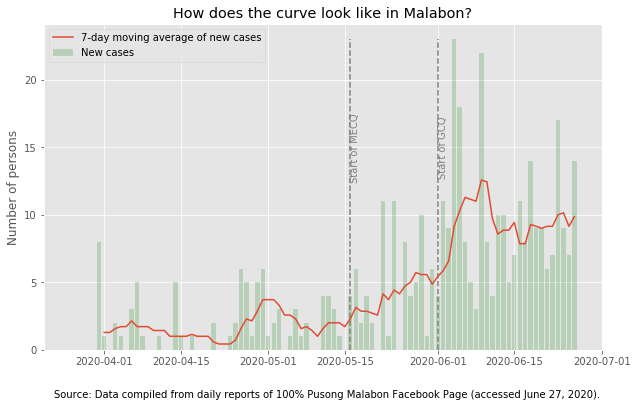

In [144]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df1.loc['Malabon City'].index, df1.loc['Malabon City', 'new_case'], color='green', alpha=0.2, label='New cases')
ax.plot(df1.loc['Malabon City', 'case_ma'], label='7-day moving average of new cases')
ax.vlines(df1.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df1.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df1.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df1.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('How does the curve look like in Malabon?')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

Average daily cases has been rising since the start of MECQ, peaked in the first half of June, and plateaued at 10 infections everyday in the second half.

How does the fatality and recovery rates compare with the curve?

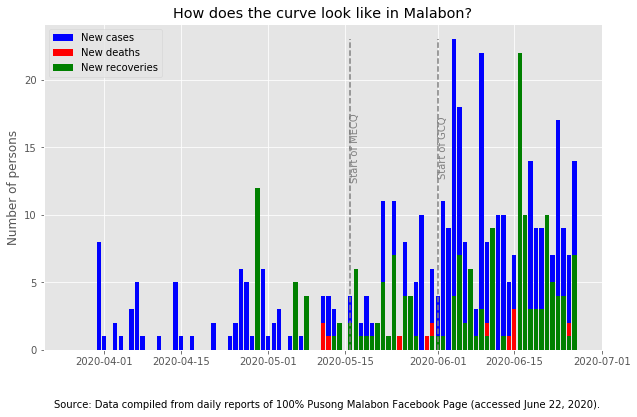

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(df1.loc['Malabon City'].index, df1.loc['Malabon City', 'new_case'], color='blue', label='New cases')
ax.bar(df1.loc['Malabon City'].index, df1.loc['Malabon City', 'new_death'], color='red', label='New deaths')
ax.bar(df1.loc['Malabon City'].index, df1.loc['Malabon City', 'new_recovered'], color='green', label='New recoveries')
ax.vlines(df1.loc['Malabon City'].index[51], 0, 23, color='gray', linestyle='dashed')
ax.vlines(df1.loc['Malabon City'].index[67], 0, 23, color='gray', linestyle='dashed')
ax.text(df1.loc['Malabon City'].index[51], 15, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df1.loc['Malabon City'].index[67], 15, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('How does the curve look like in Malabon?')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 22, 2020).', 
            (0,0), (10,-50), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

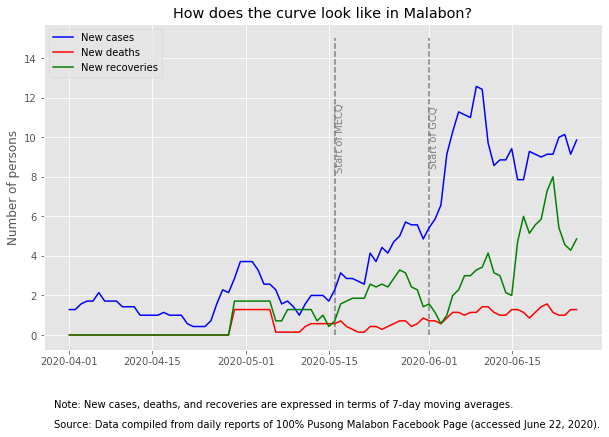

In [147]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df1.loc['Malabon City', 'case_ma'], label='New cases', color='blue')
ax.plot(df1.loc['Malabon City', 'death_ma'], label='New deaths', color='red')
ax.plot(df1.loc['Malabon City', 'recovered_ma'], label='New recoveries', color='green')
ax.vlines(df1.loc['Malabon City'].index[51], 0, 15, color='gray', linestyle='dashed')
ax.vlines(df1.loc['Malabon City'].index[67], 0, 15, color='gray', linestyle='dashed')
ax.text(df1.loc['Malabon City'].index[51], 10, 'Start of MECQ', verticalalignment='center', rotation=90, color='gray')
ax.text(df1.loc['Malabon City'].index[67], 10, 'Start of GCQ', verticalalignment='center', rotation=90, color='gray')
ax.legend(loc='upper left')
ax.set_ylabel('Number of persons')
ax.set_title('How does the curve look like in Malabon?')
ax.annotate('Note: New cases, deaths, and recoveries are expressed in terms of 7-day moving averages.', (0,0), (10,-50), 
            xycoords='axes fraction', textcoords='offset points', va='top')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 22, 2020).', 
            (0,0), (10,-70), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [53]:
df1.loc['Malabon City', ['recovered_ma', 'death_ma']].max()

recovered_ma    8.000000
death_ma        1.571429
dtype: float64

Recovery rate has been impressive late June, peaking 8 recoveries daily on average. Fatality rate, meanwhile, falls in 1-2 deaths per day on average.

Let's look at the barangay level. Let's rank according to confirmed cases.

In [69]:
df1.groupby(level=0).max().sort_values(by='confirmed', ascending=False).iloc[1:, 1:5]

,confirmed,death,recovered,active
brgy_name,,,,
Longos,69,12,28,29
Tonsuya,46,3,20,28
Tugatog,35,3,16,17
Potrero,32,2,18,17
Catmon,29,7,11,11
Tinajeros,28,7,13,10
Tanong,26,4,7,15
Ibaba,26,3,10,16
San Agustin,24,2,6,16


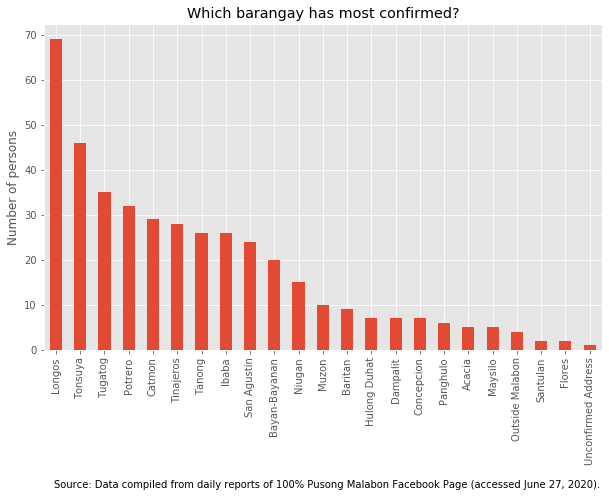

In [152]:
ax = df1.groupby(level=0).max().sort_values(by='confirmed', ascending=False).iloc[1:24, 1].plot(kind='bar', figsize=(10, 6))
ax.set_title('Which barangay has most confirmed?')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-130), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

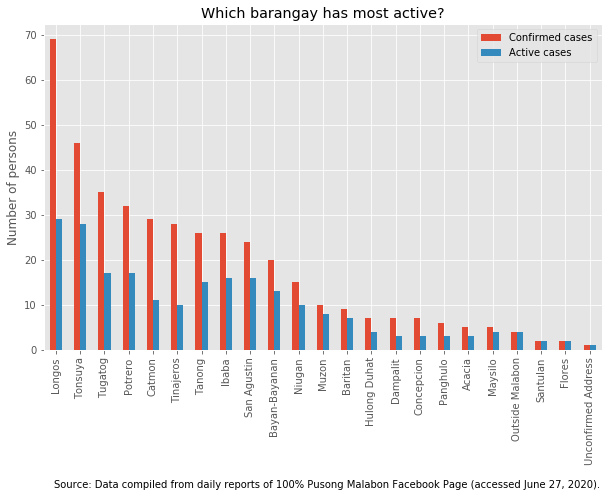

In [153]:
ax = df1.groupby(level=0).max().sort_values(by='confirmed', ascending=False).iloc[1:24, [1, 4]].plot(kind='bar', figsize=(10, 6))
ax.set_title('Which barangay has most active?')
ax.set_xlabel('')
ax.set_ylabel('Number of persons')
ax.legend(['Confirmed cases', 'Active cases'])
ax.annotate('Source: Data compiled from daily reports of 100% Pusong Malabon Facebook Page (accessed June 27, 2020).', 
            (0,0), (10,-130), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()